# Nonlinear decision boundary with logistic regression and nonlinear feature transformation

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns; sns.set_style('whitegrid')
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## a. Generate data

In [2]:
X_1, X_2 = np.random.uniform(size=500) - 0.5, np.random.uniform(size=500) - 0.5
Y = np.sign(X_1**2 - X_2**2)

data = pd.DataFrame({'X_1': X_1, 'X_2': X_2, 'Y': Y})
data.head()

,X_1,X_2,Y
0,0.314655,0.347183,-1.0
1,0.042885,-0.171818,-1.0
2,-0.365191,-0.486412,-1.0
3,-0.284827,-0.241447,1.0
4,-0.061084,-0.190989,-1.0


## b. Scatterplot

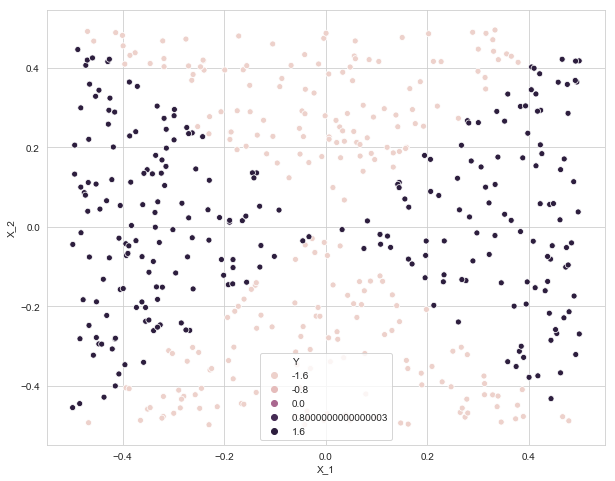

In [3]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=data['X_1'], y=data['X_2'], data=data, hue='Y')

## c. Train linear Logistic Regression model

Here we fit a logistic regression model
$$ P(Y = k) = \exp(\beta_0 + \beta_1 X_1 + \beta_2 X_2)$$

In [4]:
from sklearn.linear_model import LogisticRegression

linear_logit = LogisticRegression()
linear_logit.fit(data[['X_1', 'X_2']], data['Y'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

## d. Linear logistic regression model prediction for training data

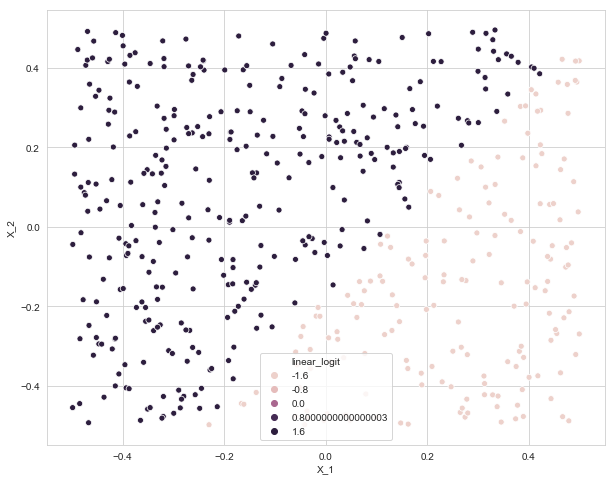

In [5]:
data['linear_logit'] = linear_logit.predict(data[['X_1', 'X_2']])


plt.figure(figsize=(10, 8))
sns.scatterplot(x=data['X_1'], y=data['X_2'], data=data, hue='linear_logit')

## e. Train nonlinear logisitic regression models

We'll train a model

$$P(Y = k) =  \exp\left(\beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_1^2 + \beta_4 X_2^2 + \beta_5 X_1X_2
                        + \beta_6 \log(|X_1|) + \beta_7 \log(|X_2|) + \beta_8 \log(|X_1 X_2|) \right)$$




In [6]:
# transform data
trans_data = data[['X_1', 'X_2']].copy()
trans_data['X_1^2'] = data['X_1']**2
trans_data['X_2^2'] = data['X_2']**2
trans_data['X_1X_2'] = data['X_1']*data['X_2']
trans_data['log(X_1)'] = np.log(np.absolute(trans_data[['X_1']]))
trans_data['log(X_2)'] = np.log(np.absolute(trans_data[['X_2']]))
trans_data['log(X_1X_2)'] = np.log(np.absolute(trans_data[['X_1X_2']]))
trans_data['Y'] = data['Y']
trans_data.head()

,X_1,X_2,X_1^2,X_2^2,X_1X_2,log(X_1),log(X_2),log(X_1X_2),Y
0,0.314655,0.347183,0.099008,0.120536,0.109243,-1.156278,-1.057902,-2.214180,-1.0
1,0.042885,-0.171818,0.001839,0.029521,-0.007368,-3.149226,-1.761322,-4.910548,-1.0
2,-0.365191,-0.486412,0.133364,0.236596,0.177633,-1.007335,-0.720700,-1.728035,-1.0
3,-0.284827,-0.241447,0.081126,0.058297,0.068771,-1.255874,-1.421104,-2.676979,1.0
4,-0.061084,-0.190989,0.003731,0.036477,0.011666,-2.795504,-1.655540,-4.451044,-1.0


In [7]:
# fit model
nonlinear_logit = LogisticRegression()
nonlinear_logit.fit(trans_data.drop(columns=['Y']), trans_data['Y'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

## f. Nonlinear logistic regression model prediction for training data

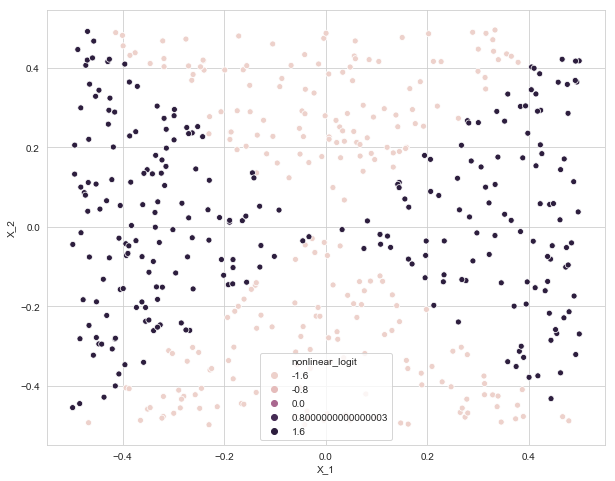

In [8]:
trans_data['nonlinear_logit'] = nonlinear_logit.predict(trans_data.drop(columns=['Y']))

plt.figure(figsize=(10, 8))
sns.scatterplot(x=trans_data['X_1'], y=trans_data['X_2'], data=trans_data, hue='nonlinear_logit')

## g. Train linear SVC and get prediction for training data

In [9]:
from sklearn.svm import SVC

linear_svc = SVC(kernel='linear')
linear_svc.fit(data.drop(columns=['Y']), data['Y'])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

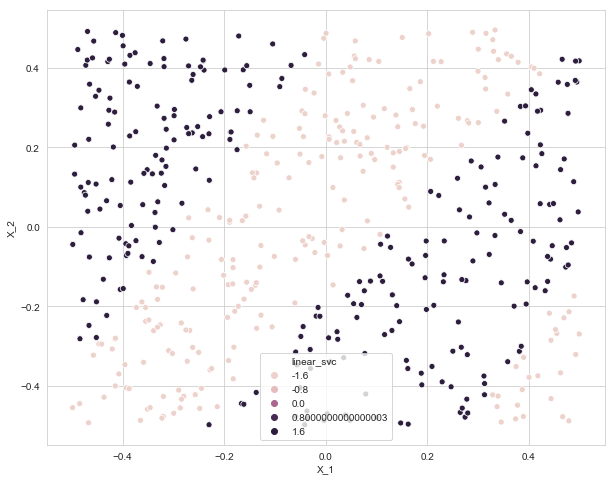

In [10]:
data['linear_svc'] = linear_svc.predict(data.drop(columns=['Y']))

plt.figure(figsize=(10, 8))
sns.scatterplot(x=data['X_1'], y=data['X_2'], data=data, hue='linear_svc')

## h. Train nonlinear SVM and get prediction for training data

In [11]:
rbf_svc = SVC(kernel='rbf')
rbf_svc.fit(data.drop(columns=['Y']), data['Y'])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

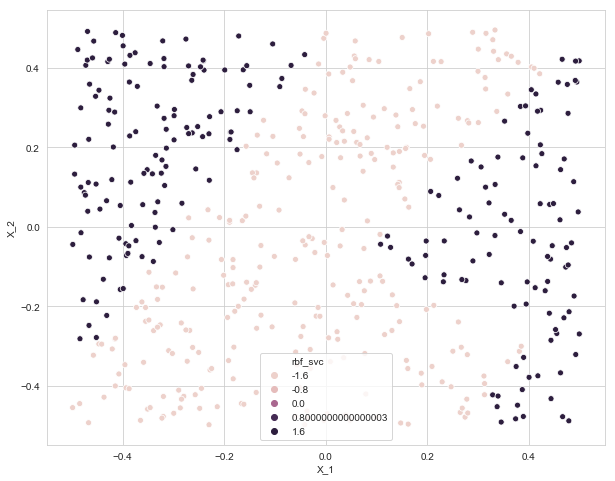

In [12]:
data['rbf_svc'] = rbf_svc.predict(data.drop(columns=['Y']))

plt.figure(figsize=(10, 8))
sns.scatterplot(x=data['X_1'], y=data['X_2'], data=data, hue='rbf_svc')